In [1]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=b083d9b2fd321ec22080f86f27ee533037051ff10bd9f842936bafb511701a47
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [2]:
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt

In [3]:
#https://en.wikipedia.org/wiki/A_Song_of_Ice_and_Fire
SEED1 = "A Song of Ice and Fire".title()

todo_lst1 = [(0, SEED1)]
todo_set1 = set(SEED1)
done_set1 = set()

g1 = nx.DiGraph()
layer, page = todo_lst1[0]

while layer < 2:
  del todo_lst1[0]
  done_set1.add(page)

  print(layer, page)
  try:
    wiki = wikipedia.page(page, auto_suggest=False)
  except:
    print("Couldn't load", page)
    layer, page = todo_lst1[0]
    continue

  for link in wiki.links:
    link = link.title()
    if not link.startswith("List Of"):
      if link not in todo_set1 and link not in done_set1:
        todo_lst1.append((layer + 1, link))
        todo_set1.add(link)
      g1.add_edge(page, link)
  layer, page = todo_lst1[0]

print("{} nodes, {} edges".format(len(g1), nx.number_of_edges(g1)))

0 A Song Of Ice And Fire
1 68Th Primetime Emmy Awards
Couldn't load 68Th Primetime Emmy Awards
1 A Clash Of Kings
Couldn't load A Clash Of Kings
1 A Clash Of Kings (Comics)
Couldn't load A Clash Of Kings (Comics)
1 A Dance With Dragons
1 A Dream Of Spring
Couldn't load A Dream Of Spring
1 A Feast For Crows
1 A Game Of Thrones
Couldn't load A Game Of Thrones
1 A Game Of Thrones: Genesis
Couldn't load A Game Of Thrones: Genesis
1 A Game Of Thrones: Second Edition (Card Game)
Couldn't load A Game Of Thrones: Second Edition (Card Game)
1 A Game Of Thrones (Board Game)
Couldn't load A Game Of Thrones (Board Game)
1 A Game Of Thrones (Card Game)
Couldn't load A Game Of Thrones (Card Game)
1 A Game Of Thrones (Comics)
Couldn't load A Game Of Thrones (Comics)
1 A Game Of Thrones (Role-Playing Game)
Couldn't load A Game Of Thrones (Role-Playing Game)
1 A Knight Of The Seven Kingdoms (Tv Series)
Couldn't load A Knight Of The Seven Kingdoms (Tv Series)
1 A Song For Lya
Couldn't load A Song For Ly

Remover páginas repitidas no plural e referenciando a si mesmas

In [4]:
g1.remove_edges_from(nx.selfloop_edges(g1))

duplicates1 = [(node, node+'s') for node in g1 if node+'s' in g1]

for dup in duplicates1:
  g1 = nx.contracted_nodes(g1, *dup, self_loops=False)

In [5]:
print(g1.number_of_nodes(), g1.number_of_edges())

47806 91866


Remover páginas repitidas com hífen

In [6]:
duplicates1 = [(x, y) for x, y in [(node, node.replace('-', ' ')) for node in g1] if x!= y and y in g1]

for dup in duplicates1:
  g1 = nx.contracted_nodes(g1, *dup, self_loops=False)

Remover atributo de dicionário do grafo que não é suportado pelo graphml

In [7]:
original1 = g1.copy()

nx.set_node_attributes(g1, 0,"contraction")
nx.set_edge_attributes(g1, 0,"contraction")

In [8]:
print(g1.number_of_nodes(), g1.number_of_edges())

47782 91856


Quantidade de nós com grau 1

In [9]:
count = 0
for x, y in list(g1.degree()):
  if y == 1:
    count += 1

print(count)

35016


Maior grau de um nó

In [10]:
max_degree1 = max([y for x, y in list(g1.degree())])
print(max_degree1)

1886


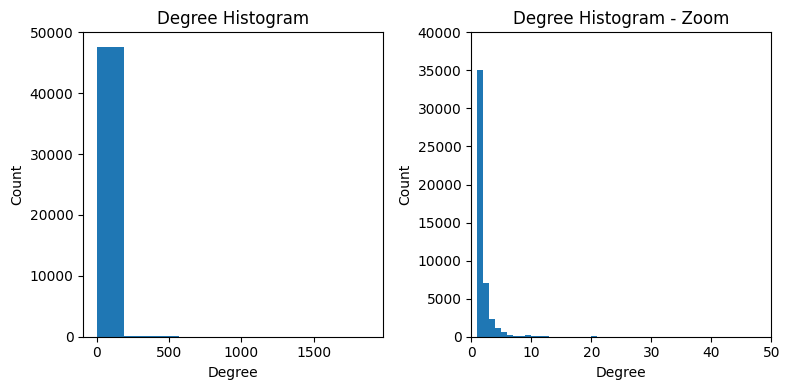

In [11]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g1.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[i for i in range(1, 51)])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,50000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,50)
ax[1].set_ylim(0,40000)

plt.tight_layout()
plt.show()

Filtrar nós com grau 2 ou maior, pois nós com grau 1 poluem muito os dados e técnicamente não tem muita relevancia



In [12]:
core = [node for node, deg in dict(g1.degree()).items() if deg >= 2]

gsub = nx.subgraph(g1, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "asoiaf.graphml")

12766 nodes, 56840 edges


In [13]:
print("Nodes removed: {:.2f}%".format(100*(1 - 12762/47749)))
print("Edges removed: {:.2f}%".format(100*(1 - 56818/91805)))
print("Edges per nodes: {:.2f}".format(56818/12762))

Nodes removed: 73.27%
Edges removed: 38.11%
Edges per nodes: 4.45


In [14]:
import seaborn as sns

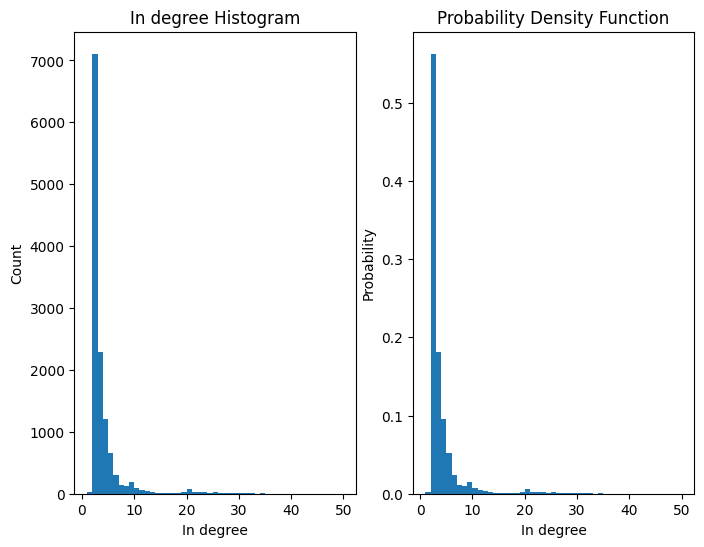

In [74]:
degree_sequence = sorted([d for n, d in gsub.in_degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=[i for i in range(1, 51)])
ax[1].hist(degree_sequence,bins=[i for i in range(1, 51)],density=True)

ax[0].set_title("In degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("In degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("In degree")

plt.show()

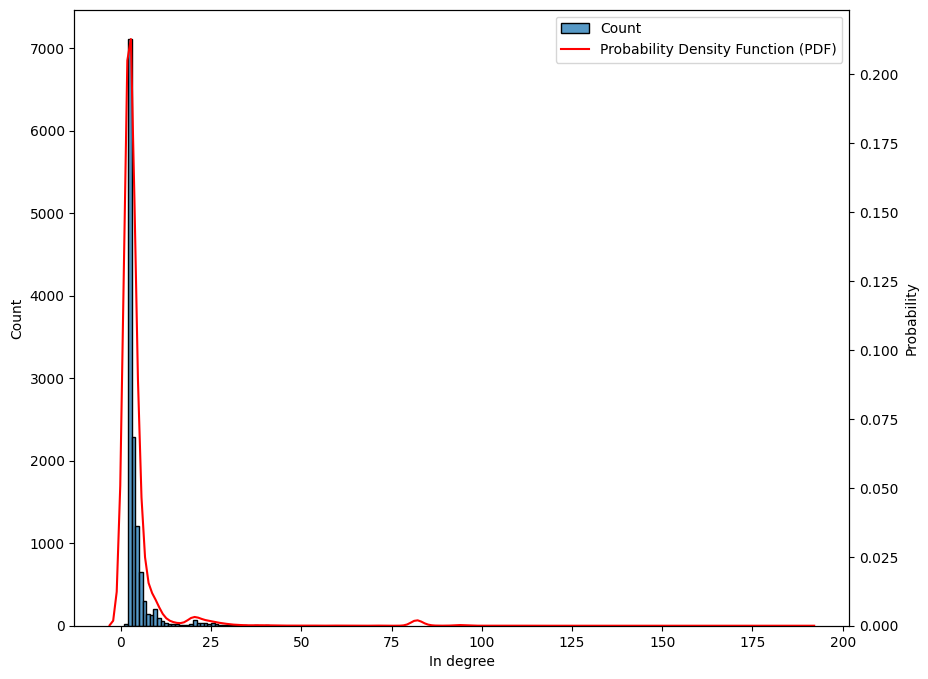

In [75]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence, bins=[i for i in range(1, 51)], label="Count", ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence, color='r', label="Probability Density Function (PDF)", ax=ax2)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("In degree")
ax2.set_ylabel("Probability")

plt.savefig('asoiaf_probability_density_function.png', transparent=False,dpi=600,bbox_inches="tight")
plt.show()

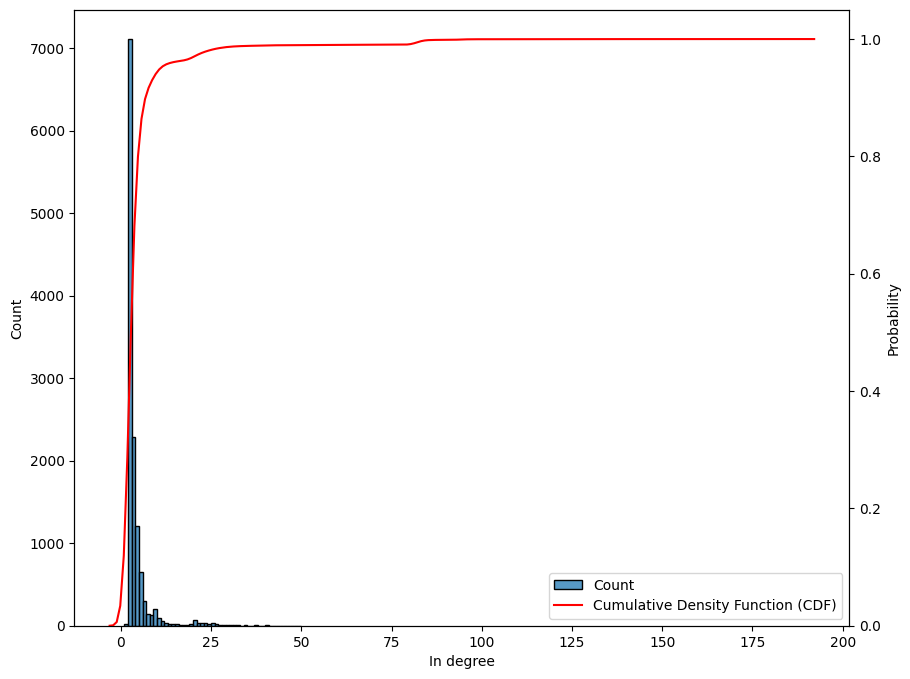

In [76]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=[i for i in range(1, 51)],label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("In degree")
ax2.set_ylabel("Probability")

plt.savefig('asoiaf_cumulative_density_function.png', transparent=False,dpi=600,bbox_inches="tight")
plt.show()

In [38]:
#https://en.wikipedia.org/wiki/The_Lord_of_the_Rings
SEED2 = "The Lord of the Rings".title()

todo_lst2 = [(0, SEED2)]
todo_set2 = set(SEED2)
done_set2 = set()

g2 = nx.DiGraph()
layer, page = todo_lst2[0]

while layer < 2:
  del todo_lst2[0]
  done_set2.add(page)

  print(layer, page)
  try:
    wiki = wikipedia.page(page, auto_suggest=False)
  except:
    print("Couldn't load", page)
    layer, page = todo_lst2[0]
    continue

  for link in wiki.links:
    link = link.title()
    if not link.startswith("List Of"):
      if link not in todo_set2 and link not in done_set2:
        todo_lst2.append((layer + 1, link))
        todo_set2.add(link)
      g2.add_edge(page, link)
  layer, page = todo_lst2[0]

print("{} nodes, {} edges".format(len(g2), nx.number_of_edges(g2)))

0 The Lord Of The Rings
1 A Companion To J. R. R. Tolkien
Couldn't load A Companion To J. R. R. Tolkien
1 A Elbereth Gilthoniel
1 A Map Of Middle-Earth
Couldn't load A Map Of Middle-Earth
1 A Night In Rivendell
Couldn't load A Night In Rivendell
1 A Question Of Time (Book)
Couldn't load A Question Of Time (Book)
1 A Secret Vice
1 A Tolkien Compass
1 A Walking Song
1 A Mythology For England
Couldn't load A Mythology For England
1 Academy Award For Best Adapted Screenplay
Couldn't load Academy Award For Best Adapted Screenplay
1 Academy Award For Best Director
Couldn't load Academy Award For Best Director
1 Academy Award For Best Picture
Couldn't load Academy Award For Best Picture
1 Academy Awards
1 Ace Books
1 Action-Adventure Game
Couldn't load Action-Adventure Game
1 Adaptations Of The Lord Of The Rings
Couldn't load Adaptations Of The Lord Of The Rings
1 Addiction To Power In The Lord Of The Rings
Couldn't load Addiction To Power In The Lord Of The Rings
1 Adventure Novel
Couldn't l

In [39]:
g2.remove_edges_from(nx.selfloop_edges(g2))

duplicates2 = [(node, node+'s') for node in g2 if node+'s' in g2]

for dup in duplicates2:
  g2 = nx.contracted_nodes(g2, *dup, self_loops=False)

In [40]:
duplicates2 = [(x, y) for x, y in [(node, node.replace('-', ' ')) for node in g2] if x!= y and y in g2]

for dup in duplicates2:
  g2 = nx.contracted_nodes(g2, *dup, self_loops=False)

In [41]:
original2 = g2.copy()

nx.set_node_attributes(g2, 0,"contraction")
nx.set_edge_attributes(g2, 0,"contraction")

In [42]:
print(g2.number_of_nodes(), g2.number_of_edges())

63803 203177


In [43]:
count = 0
for x, y in list(g2.degree()):
  if y == 1:
    count += 1

print("nós com grau 1:",count)

nós com grau 1: 43700


In [44]:
max_degree2 = max([y for x, y in list(g2.degree())])
print("maior grau:",max_degree2)

maior grau: 2476


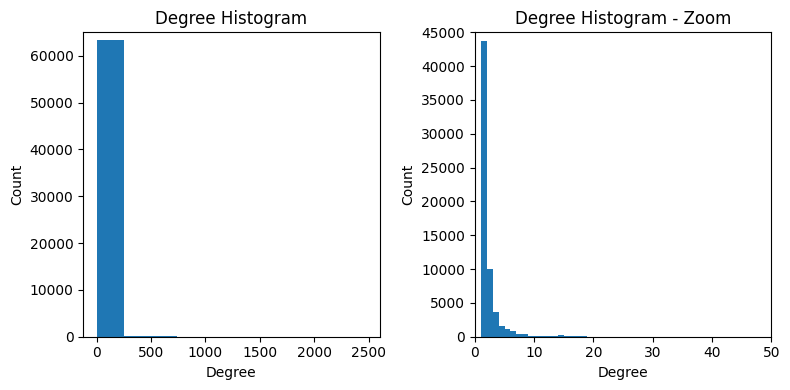

In [45]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g2.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[i for i in range(1, 51)])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,65000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,50)
ax[1].set_ylim(0,45000)

plt.tight_layout()
plt.show()

In [46]:
core2 = [node for node, deg in dict(g2.degree()).items() if deg >= 2]

gsub2 = nx.subgraph(g2, core2)

print("{} nodes, {} edges".format(len(gsub2), nx.number_of_edges(gsub2)))

nx.write_graphml(gsub2, "lotr.graphml")

20103 nodes, 159477 edges


In [47]:
print("Nodes removed: {:.2f}%".format(100*(1 - 20102/63793)))
print("Edges removed: {:.2f}%".format(100*(1 - 159065/202756)))
print("Edges per nodes: {:.2f}".format(159065/20102))

Nodes removed: 68.49%
Edges removed: 21.55%
Edges per nodes: 7.91


Como pode ver o grafo para o Senhor dos Anéis, apesar de ainda com muitos nós com apenas grau 1, obteve uma distribuição de grau um pouco melhor que o grafo para as Crônicas de Gelo e Fogo

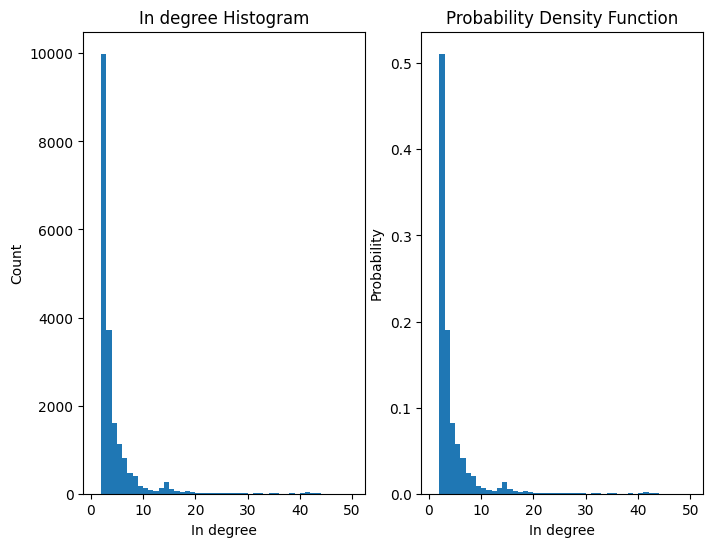

In [77]:
degree_sequence = sorted([d for n, d in gsub2.in_degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=[i for i in range(1, 51)])
ax[1].hist(degree_sequence,bins=[i for i in range(1, 51)],density=True)

ax[0].set_title("In degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("In degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("In degree")

plt.show()

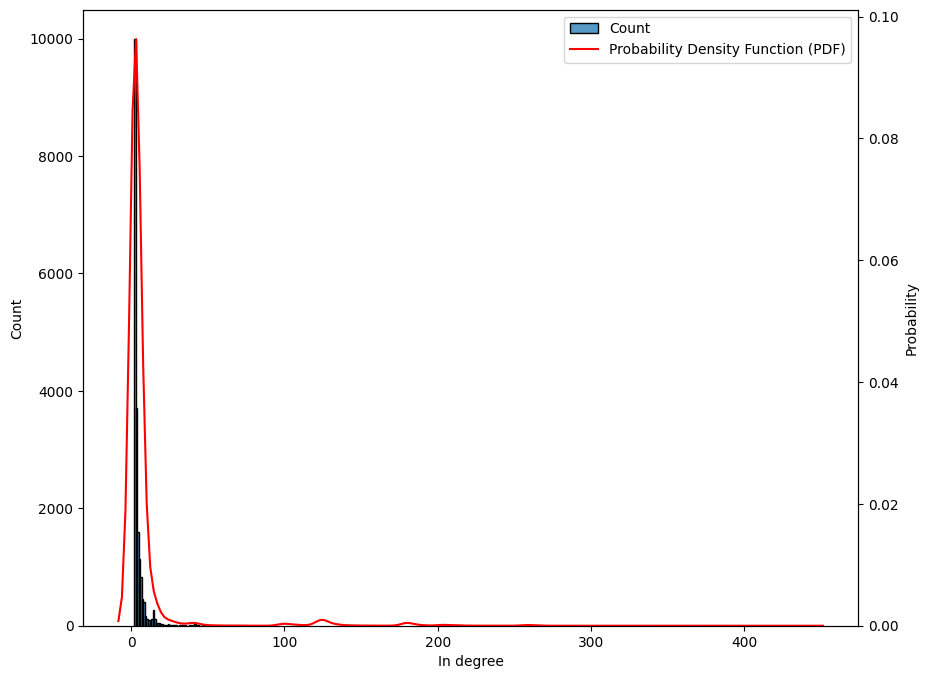

In [78]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence, bins=[i for i in range(1, 51)], label="Count", ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence, color='r', label="Probability Density Function (PDF)", ax=ax2)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("In degree")
ax2.set_ylabel("Probability")

plt.savefig('lotr_probability_density_function.png', transparent=False,dpi=600,bbox_inches="tight")
plt.show()

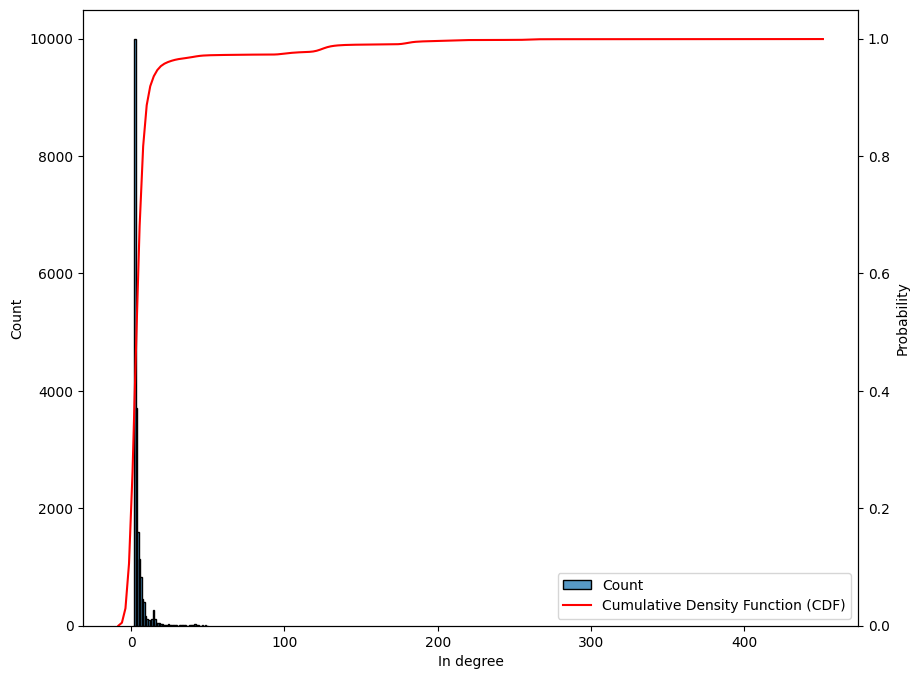

In [79]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=[i for i in range(1, 51)],label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("In degree")
ax2.set_ylabel("Probability")

plt.savefig('lotr_cumulative_density_function.png', transparent=False,dpi=600,bbox_inches="tight")
plt.show()

In [53]:
#https://en.wikipedia.org/wiki/One_Piece
SEED3 = "One Piece".title()

todo_lst3 = [(0, SEED3)]
todo_set3 = set(SEED3)
done_set3 = set()

g3 = nx.DiGraph()
layer, page = todo_lst3[0]

while layer < 2:
  del todo_lst3[0]
  done_set3.add(page)

  print(layer, page)
  try:
    wiki = wikipedia.page(page, auto_suggest=False)
  except:
    print("Couldn't load", page)
    layer, page = todo_lst3[0]
    continue

  for link in wiki.links:
    link = link.title()
    if not link.startswith("List Of"):
      if link not in todo_set3 and link not in done_set3:
        todo_lst3.append((layer + 1, link))
        todo_set3.add(link)
      g3.add_edge(page, link)
  layer, page = todo_lst3[0]

print("{} nodes, {} edges".format(len(g3), nx.number_of_edges(g3)))

0 One Piece
1 2016 Kumamoto Earthquakes
Couldn't load 2016 Kumamoto Earthquakes
1 2020 Tokyo Olympics
1 4Kids Entertainment
1 About.Com
1 Adventure Fiction
Couldn't load Adventure Fiction
1 Agency For Cultural Affairs
Couldn't load Agency For Cultural Affairs
1 Akamaru Jump
1 Akane-Banashi
Couldn't load Akane-Banashi
1 Akira Toriyama
1 Alabasta
1 All Caps
1 Animate (Retailer)
Couldn't load Animate (Retailer)
1 Anime
1 Anime News Network
1 Art Book
Couldn't load Art Book
1 Asahi Shimbun
1 Astro Royale
1 Australasia
1 Avex Trax
1 Bfm Tv
Couldn't load Bfm Tv
1 Bandai
1 Bandai Namco Entertainment
1 Baramicin
1 Baron Omatsuri And The Secret Island
Couldn't load Baron Omatsuri And The Secret Island
1 Battle Stadium D.O.N
1 Berkshire Hathaway
1 Blackbeard
1 Blue Box (Manga)
Couldn't load Blue Box (Manga)
1 Bomber Girl
1 Bounty Hunter
1 Brook (One Piece)
1 Business Wire
1 Butsu Zone
1 Covid-19
1 Covid-19 Pandemic
1 Cape Town
1 Captain Tsubasa
1 Character Song
Couldn't load Character Song
1 Chi

In [54]:
g3.remove_edges_from(nx.selfloop_edges(g3))

duplicates3 = [(node, node+'s') for node in g3 if node+'s' in g3]

for dup in duplicates3:
  g3 = nx.contracted_nodes(g3, *dup, self_loops=False)

In [55]:
duplicates3 = [(x, y) for x, y in [(node, node.replace('-', ' ')) for node in g3] if x!= y and y in g3]

for dup in duplicates3:
  g3 = nx.contracted_nodes(g3, *dup, self_loops=False)

In [56]:
original3 = g3.copy()

nx.set_node_attributes(g3, 0,"contraction")
nx.set_edge_attributes(g3, 0,"contraction")

In [57]:
print(g3.number_of_nodes(), g3.number_of_edges())

43815 84654


In [58]:
count = 0
for x, y in list(g3.degree()):
  if y == 1:
    count += 1

print("nós com grau 1:",count)

nós com grau 1: 30410


In [59]:
max_degree3 = max([y for x, y in list(g3.degree())])
print("maior grau:",max_degree3)

maior grau: 2147


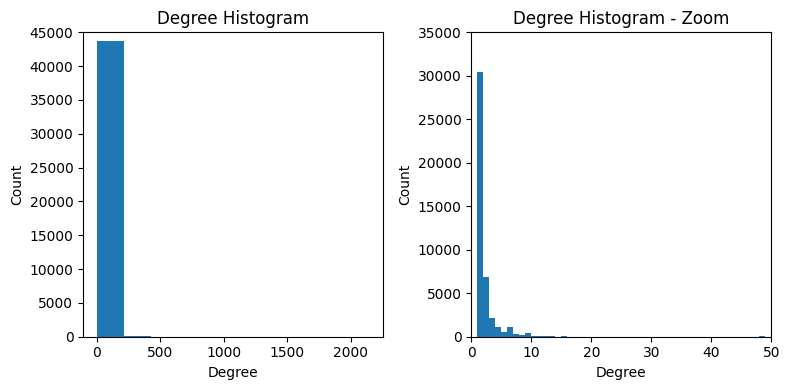

In [60]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g3.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[i for i in range(1, 51)])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,45000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,50)
ax[1].set_ylim(0,35000)

plt.tight_layout()
plt.show()

In [61]:
core3 = [node for node, deg in dict(g3.degree()).items() if deg >= 2]

gsub3 = nx.subgraph(g3, core3)

print("{} nodes, {} edges".format(len(gsub3), nx.number_of_edges(gsub3)))

nx.write_graphml(gsub3, "one_piece.graphml")

13405 nodes, 54244 edges


In [62]:
print("Nodes removed: {:.2f}%".format(100*(1 - 13419/44015)))
print("Edges removed: {:.2f}%".format(100*(1 - 54279/84875)))
print("Edges per nodes: {:.2f}".format(54279/13419))

Nodes removed: 69.51%
Edges removed: 36.05%
Edges per nodes: 4.04


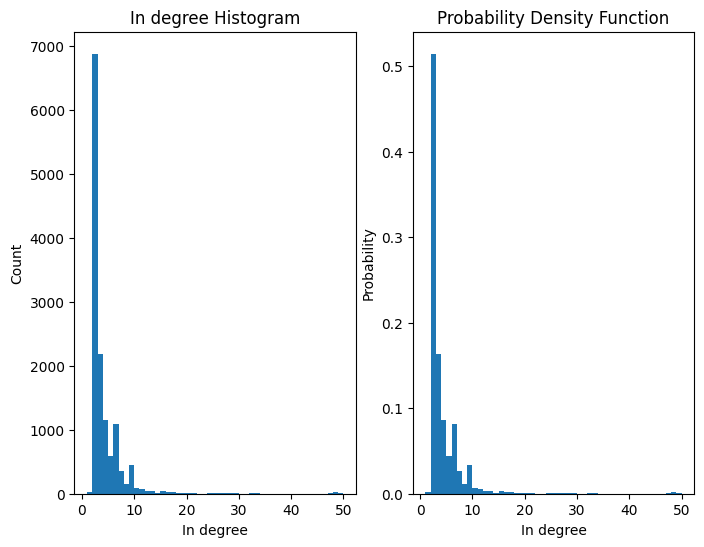

In [80]:
degree_sequence = sorted([d for n, d in gsub3.in_degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=[i for i in range(1, 51)])
ax[1].hist(degree_sequence,bins=[i for i in range(1, 51)],density=True)

ax[0].set_title("In degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("In degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("In degree")

plt.show()

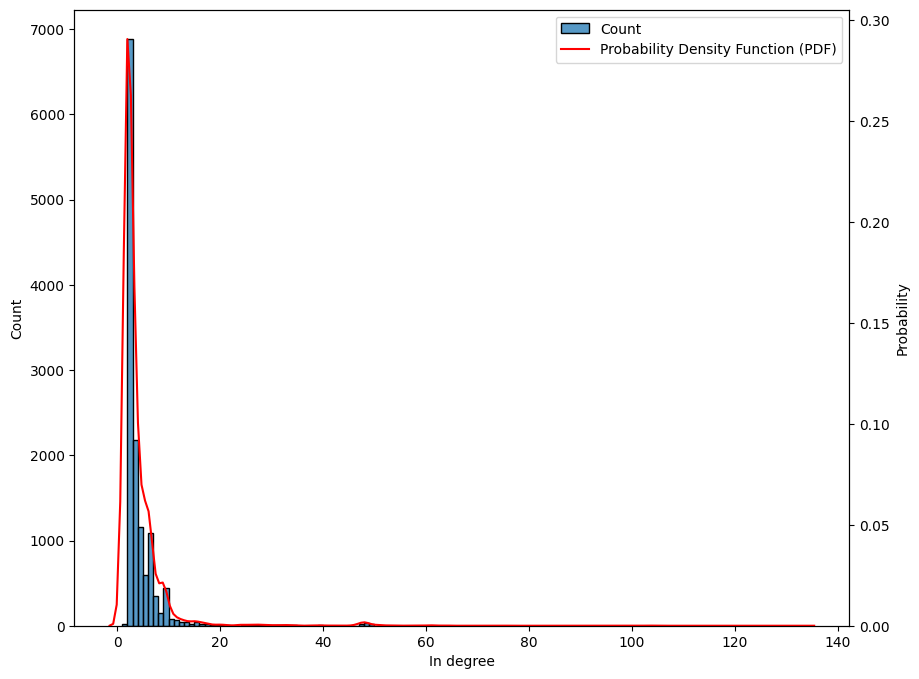

In [81]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence, bins=[i for i in range(1, 51)], label="Count", ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence, color='r', label="Probability Density Function (PDF)", ax=ax2)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("In degree")
ax2.set_ylabel("Probability")

plt.savefig('one_piece_probability_density_function.png', transparent=False,dpi=600,bbox_inches="tight")
plt.show()

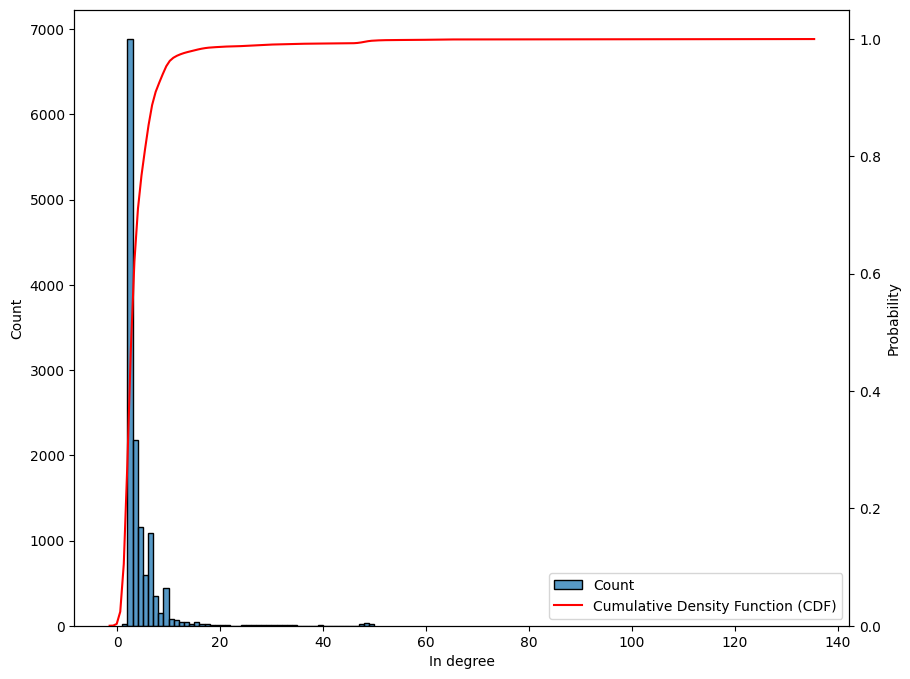

In [82]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=[i for i in range(1, 51)],label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("In degree")
ax2.set_ylabel("Probability")

plt.savefig('one_piece_cumulative_density_function.png', transparent=False,dpi=600,bbox_inches="tight")
plt.show()